## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Вариант 9

In [ ]:
feats_1 = np.array([
    [-1.1, -4.3],
    [ 1.8, -1],
    [ 4.8, -1],
    [ 1.2, -3.5],
    [-1.2, -3.4],
    [ 2.5,  3.7],
])
labels_1 = np.array([0, 1, 1, 1, 0, 1])

feats_broken = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
labels_broken = np.array([1, 0, 0, 1])

feats_2 = np.array([
    [4.6,   1.7],
    [-1,    4.3],
    [-0.3, -2.7],
    [-1.1,  2],
    [ 0.5,  2.5],
    [ 4.9,  4.6],
    [ 0.3,  4.6],
    [-3.9, -4.5],
])
labels_2 = np.array([
    [1, 1],
    [0, 0],
    [1, 1],
    [1, 0],
    [1, 0],
    [1, 0],
    [0, 0],
    [1, 1],
])

## Исходный код

### Персептрон и нейронная сеть

In [ ]:
class Perceptron():
    def __init__(self, input_size):
        self._W = np.random.normal(0, 1.0/np.sqrt(input_size), (input_size, ))
        self._b = 0
        self._learn_rate = None
        
    def __repr__(self):
        return (
            f"Perceptron | lr = {self._learn_rate:4.3f} | W = {self._W} | b = {self._b:7.5f}"
        )
        
    def configure(self, *, learn_rate):
        if learn_rate is not None:
            self._learn_rate = learn_rate
        
    def train(self, train_data, train_targets):
        if self._learn_rate is None:
            raise ValueError("Perceptron learn rate is not configured")

        for x, y in zip(train_data, train_targets):
            p   = self.predict(x)
            err = y - p
            
            self._W += self._learn_rate * err * x
            self._b += self._learn_rate * err

    def predict(self, input_data):
        p = np.sum(np.multiply(self._W, input_data)) + self._b
        
        return np.heaviside(p, 0)
        
    def get_line(self, points):
        if len(self._W) != 2:
            raise ValueError("Perceptron must have only 2 weights to draw line")
        return np.array([-(self._b + self._W[0] * x) / self._W[1] for x in points])
    
        
class NNetwork():
    def __init__(self, input_size, output_size):
        self._perceps = [Perceptron(input_size) for _ in range(output_size)]
        self._epoch = None
        
    def __str__(self):
        lines = [repr(p) for p in self._perceps]
        max_len = max([len(l) for l in lines])
        
        string = f"Neural Network, set to {self._epoch} epochs\n"
        for p in self._perceps:
            string += '-' * max_len
            string += '\n'
            string += repr(p)
            string += '\n'
        
        return string

    def configure(self, *, epoch, learn_rate):
        if epoch is not None:
            if epoch < 1:
                raise ValueError("Epoch cannot be lower than 1")
            self._epoch = epoch
        
        if learn_rate is not None:
            for p in self._perceps: 
                p.configure(learn_rate=learn_rate)
                
    def train(self, train_data, train_targets):
        if train_targets.ndim == 1:
            # Each sample has one label
            # Turn into column for ease of calculation
            train_targets = train_targets.copy().reshape(-1, 1)
        
        if not self._is_configured():
            raise ValueError("Epoch is not configured")

        for _ in range(self._epoch):
            for i, p in enumerate(self._perceps):
                p.train(train_data, train_targets[:, i])
                
    def predict(self, input_data):
        result = []
        for p in self._perceps:
            result.append([p.predict(x) for x in input_data])
        return np.array(result).T
        
    def get_perceptron_lines(self, points):
        return np.array([p.get_line(points) for p in self._perceps])
        
    def _is_configured(self):
        return self._epoch is not None

### Функция ошибки `mae`

In [ ]:
def mean_absolute_error(predicts, targets):
    return np.mean( np.mean(np.abs(predicts - targets), axis=0) )

## Один персептрон

In [ ]:
nnet = NNetwork(2, 1)
nnet.configure(epoch=20, learn_rate=0.1)
nnet.train(feats_1, labels_1)

In [ ]:
print(nnet)

Neural Network, set to 20 epochs
----------------------------------------------------------------------
Perceptron | lr = 0.100 | W = [ 1.12768801 -0.04612574] | b = -0.10000



In [ ]:
predicts = nnet.predict(feats_1).flatten()
print("Predictions: ", predicts)
print("Error:       ", mean_absolute_error(predicts, labels_1))

Predictions:  [0. 1. 1. 1. 0. 1.]
Error:        0.0


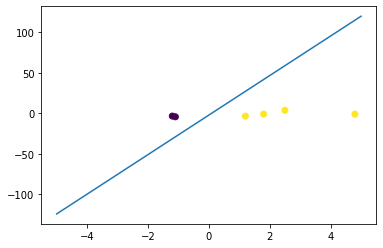

In [ ]:
plt.scatter(feats_1[:,0], feats_1[:,1], c=labels_1)
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)

## Персертрон на нелинейных данных

In [ ]:
nnet = NNetwork(2, 1)
nnet.configure(epoch=50, learn_rate=0.05)
nnet.train(feats_broken, labels_broken)

In [ ]:
print(nnet)

Neural Network, set to 50 epochs
--------------------------------------------------------------------
Perceptron | lr = 0.050 | W = [0.08995042 0.06969182] | b = -0.05000



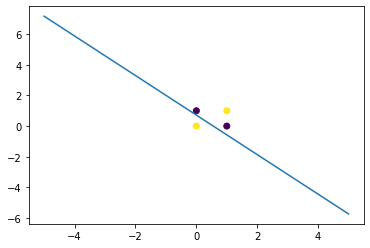

In [ ]:
plt.scatter(feats_broken[:,0], feats_broken[:,1], c=labels_broken)
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)

## Два персептрона

In [ ]:
nnet = NNetwork(2, 2)
nnet.configure(epoch=50, learn_rate=0.05)
nnet.train(feats_2, labels_2)

In [ ]:
print(nnet)

Neural Network, set to 50 epochs
---------------------------------------------------------------------
Perceptron | lr = 0.050 | W = [ 0.15528787 -0.15772261] | b = 0.65000
---------------------------------------------------------------------
Perceptron | lr = 0.050 | W = [ 0.13832601 -0.27505873] | b = 0.10000



In [ ]:
predicts = nnet.predict(feats_2)
print("Predictions:\n", predicts)
print("Error: ", mean_absolute_error(predicts, labels_2))

Predictions:  [[1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]]
Error:  0.0


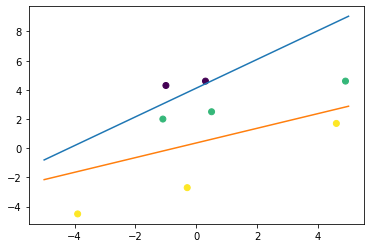

In [ ]:
plt.scatter(feats_2[:,0], feats_2[:,1], c=list(map(lambda x : x[0]*2 + x[1], labels_2)))
points = [-5, 5]
for line in nnet.get_perceptron_lines(points):
    plt.plot(points, line)